# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [3]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

<h5>1. How many unique job titles are there?</h5>

> 93 unique job titles.

<h5>2. What is the average salary (`salary_in_usd`) per `work_year`?</h5>

Average salary per work year: <br>
> 2020 - 92302.63 <br>
> 2021 - 94087.21 <br>
> 2022 - 133379.51 <br>
> 2023 - 148954.56

<h5>3. Create a bar plot showing average salary by `experience_level`.</h5>

> 💡 Tip: Use `groupby()` and `mean()`.

Number of unique job titles: 93
-----------------------------------------
Average salary per work year:
   work_year  salary_in_usd
0       2020       92302.63
1       2021       94087.21
2       2022      133379.51
3       2023      148954.56
-----------------------------------------


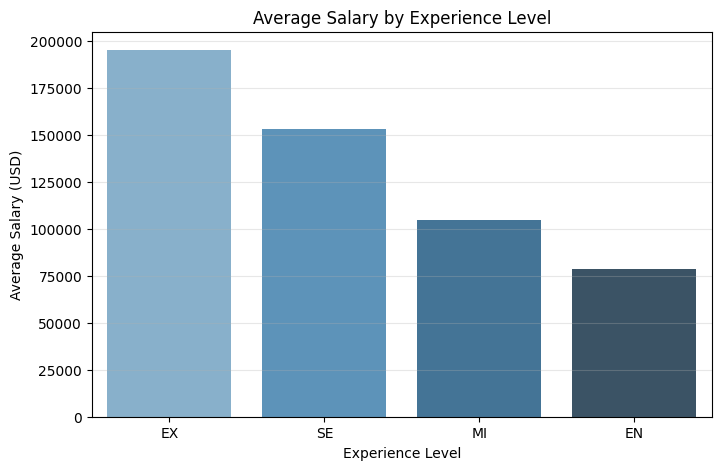

In [4]:
# Your EDA code here

# 1. How many unique job titles are there?
unique_jobs = df['job_title'].nunique()
print("Number of unique job titles:", unique_jobs)
print("-----------------------------------------")

# 2. What is the average salary (salary_in_usd) per work_year?
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().round(2).reset_index()
print("Average salary per work year:")
print(avg_salary_per_year)
print("-----------------------------------------")

# 3. Bar plot for average salary by experience level
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette="Blues_d")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis='y', alpha=0.3)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [5]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [6]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [7]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

<h5>1. Does your model make reasonable predictions? Why or why not?</h5>

> Yes, the model’s predictions make sense on a broad level salaries grow as experience increases, which is what we’d expect to see in reality. But the precision is not great because the R² score (0.15) makes us understand that this model explains only a low percentage of all the variation in salary. This means it gets a general trend correct but is then making up loads of other stuff that determines how much you get paid along the way.
   
<h5>2. What are the limitations of using only `work_year` and `experience_level`?</h5>

> Two such characteristics alone are not sufficient to account for variations in salaries. Job title, company size, location and industry also heavily influence salaries. Without these, the model oversimplifies relationships and is unable to accommodate real life complexity, such that its predictions are less accurate in terms of not capturing real variation and diversity in global salary patterns.

<h5>3. How could you improve this model? (Think: more features, better encoding, etc.)</h5>

> To improve this model, I would include additional features such as job title, company size, location, education level, and employment type. Using better encoding methods like one-hot encoding and applying feature scaling could also enhance accuracy.

<h5>4. Why is "R² not enough" to trust your predictions?</h5>
   
> The reason why R² is not enough to trust my predictions is because R² does not measure whether the predictions themselves are reasonable or do well outside of the data. A model can have a high R² and still be guilty of overfitting or predicting poorly on new data. R² can also be deceiving when a relationship between variables is not linear as in how salary growth plays out in the real world.

<br>

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀